This notebooks investigates the correlations between characteristics in the processed Fannie Mae dataset and performs PCA.

In [20]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# Read-in processed data
# Filter based on columns relevant for modelling
REQUIRED_COLUMNS = [
    "ORIG_RATE",
    "ORIG_AMOUNT",
    "ORIG_TERM",
    "OCLTV",
    "NUM_BO",
    "DTI",
    "CSCORE_B",
    "CSCORE_C",
    "FTHB_FLAG",
    "PUR_Cash_out",
    "PUR_Refinance",
    "PUR_Purchase",
    "PRO_Condominium",
    "PRO_Co_operative",
    "PRO_Planned_Urban",
    "PRO_Manufact_Home",
    "PRO_Single_Family",
    "NUM_UNIT",
    "OCC_Principal",
    "OCC_Second",
    "OCC_Investor",
    "MI_PCT",
    "MI_Borrower",
    "MI_Lender",
    "MI_Investor",
    "DLQ_FLAG"
]
complete_processed_dataset = pd.read_csv("../../2023_stat.csv")
model_data = complete_processed_dataset[REQUIRED_COLUMNS]

#### Deal with datetime cols "ORIG_DTE","FRST_DTE"
model_data["ORIG_DTE_YR"] = pd.to_datetime(complete_processed_dataset["ORIG_DTE"]).dt.year - 2000
model_data["ORIG_DTE_MONTH"] = pd.to_datetime(complete_processed_dataset["ORIG_DTE"]).dt.month
model_data["FRST_DTE_YR"] = pd.to_datetime(complete_processed_dataset["FRST_DTE"]).dt.year - 2000
model_data["FRST_DTE_MONTH"] = pd.to_datetime(complete_processed_dataset["FRST_DTE"]).dt.month

#### Fill in missing data
print(model_data.isna().sum())
for col in ["DTI", "CSCORE_B", "CSCORE_C"]: #  this should be dealt in the pre-processing
    col_median=model_data[col].median()
    model_data[col] = model_data[col].fillna(col_median)
#### Check that no more NA values are remaining
print(sum(model_data.isna().sum()))



/var/folders/js/zv14t_p906xd0p0p9fq7clrw0000gn/T/ipykernel_80446/769138881.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["ORIG_DTE_YR"] = pd.to_datetime(complete_processed_dataset["ORIG_DTE"]).dt.year - 2000
/var/folders/js/zv14t_p906xd0p0p9fq7clrw0000gn/T/ipykernel_80446/769138881.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["ORIG_DTE_MONTH"] = pd.to_datetime(complete_processed_dataset["ORIG_DTE"]).dt.month
/var/folders/js/zv14t_p906xd0p0p9fq7clrw0000gn/T/ipykernel_8044

ORIG_RATE               0
ORIG_AMOUNT             0
ORIG_TERM               0
OCLTV                   0
NUM_BO                  0
DTI                    37
CSCORE_B             1552
CSCORE_C              971
FTHB_FLAG               0
PUR_Cash_out            0
PUR_Refinance           0
PUR_Purchase            0
PRO_Condominium         0
PRO_Co_operative        0
PRO_Planned_Urban       0
PRO_Manufact_Home       0
PRO_Single_Family       0
NUM_UNIT                0
OCC_Principal           0
OCC_Second              0
OCC_Investor            0
MI_PCT                  0
MI_Borrower             0
MI_Lender               0
MI_Investor             0
DLQ_FLAG                0
ORIG_DTE_YR             0
ORIG_DTE_MONTH          0
FRST_DTE_YR             0
FRST_DTE_MONTH          0
dtype: int64
0


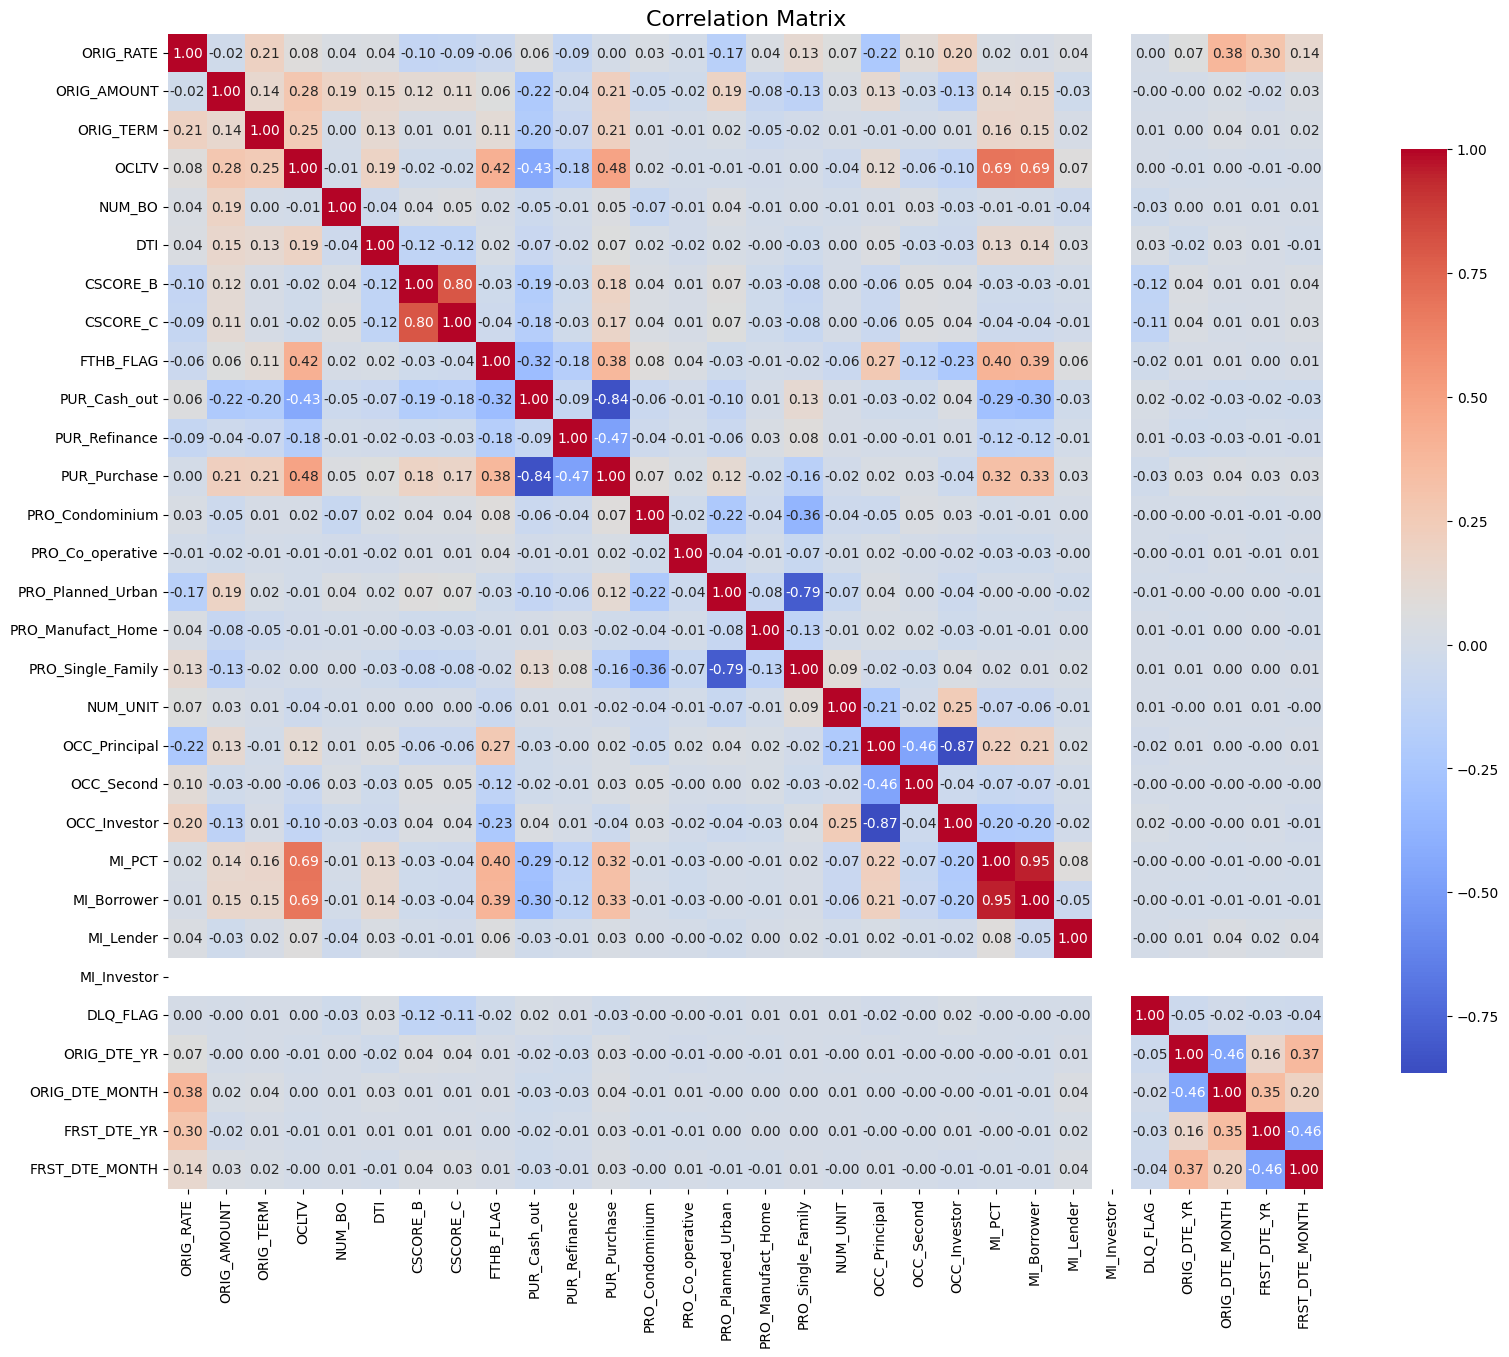

In [12]:
# Compute matrix
correlation_matrix = model_data.corr()
# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, 
             annot=True, 
             fmt=".2f", 
             cmap='coolwarm', 
             square=True, 
             cbar_kws={"shrink": .8}
            )
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [14]:
model_data["MI_Investor"].describe()

count    970186.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: MI_Investor, dtype: float64

Dropping "MI_Investor" column given that it is zero everywhere.

In [18]:
model_data.drop(columns=["MI_Investor"], inplace=True)

# Scaling data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(model_data)

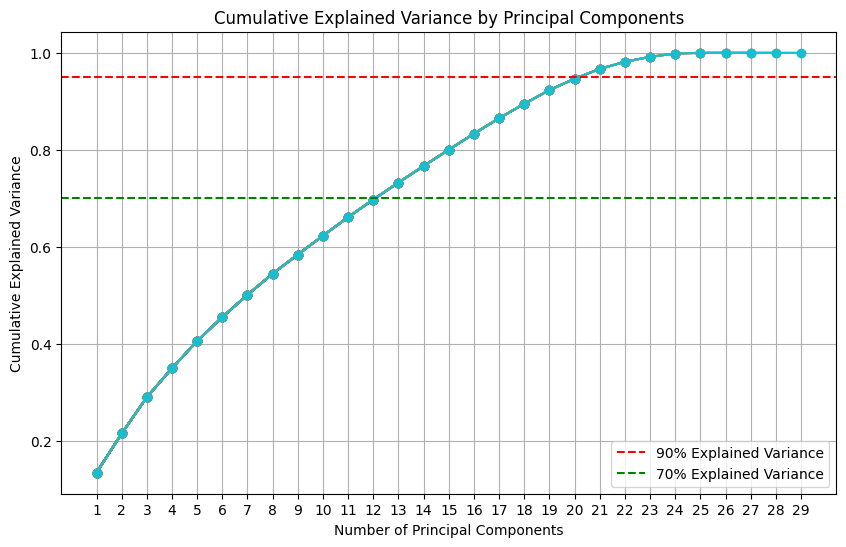

In [33]:
plt.close()
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(30):
    pca_= PCA(n_components=i)
    pca_.fit_transform(scaled_data)

    # cumulative explained variance
    explained_variance = pca_.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance)

    # Plot cumulative explained variance
    
    ax.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', )
ax.set_title('Cumulative Explained Variance by Principal Components')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.axhline(y=0.95, color='r', linestyle='--', label='90% Explained Variance')
ax.axhline(y=0.70, color='g', linestyle='--', label='70% Explained Variance')
ax.set_xticks(range(1, len(cumulative_explained_variance) + 1))
ax.legend()
ax.grid()

plt.show()